In [1]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np

from model_testing import *

In [2]:
# Parse the json files used for the test and extract the dataframe corrisponding to the msgs and audio 
df_text = test_text() 
df_audio = test_audio()

In [3]:
#df_text.User_Label.loc[df_text.User_Label == 'sadness'] = 'sad'
df_text.User_Label.loc[df_text.User_Label == 'angry'] = 'anger'

df_audio.User_Label.loc[df_audio.User_Label == 'sadness'] = 'sad'

## BALANCING

In [4]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_text, df_text.User_Label, test_size=0.1)

In [6]:
X_train

,Message,User_Label,Model_Label
406,Or maybe not,neutral,neutral
126,you wanna make me angry?,anger,anger
1,i love this app,joy,joy
492,here we are again,sadness,neutral
35,we used java,neutral,neutral
...,...,...,...
282,Mine was amazing,joy,neutral
690,My imagination is endless,neutral,joy
62,due to exams and more,neutral,neutral
33,i don't want to be killed,fear,neutral


In [7]:
X_res_text, y_res_text = rus.fit_resample(X_train, y_train)

<AxesSubplot:>

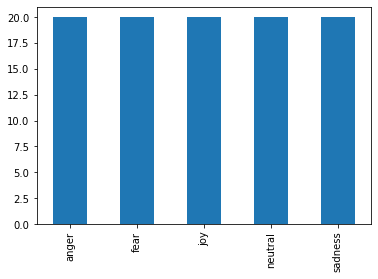

In [8]:
round(X_res_text.User_Label.value_counts(normalize=True)*100,2).plot(kind='bar')

In [9]:
X_train.shape

(640, 3)

In [10]:
X_res_text.shape

(220, 3)

In [11]:
X_test.shape

(72, 3)

In [12]:
X_res_text = X_res_text[['Message', 'User_Label']]
X_res_text = X_res_text.rename(columns = {'Message':'tweet', 'User_Label':'emotion'})
test = X_test[['Message', 'User_Label']]
test = test.rename(columns = {'Message':'tweet', 'User_Label':'emotion'})

In [13]:
# LOAD WASSA DATASET
WASSA_TRAIN = (pd.read_csv('./wassa_off_train.csv'))
WASSA_TEST = pd.read_csv('./wassa_off_test.csv')

In [14]:
wassa_joy_train = WASSA_TRAIN[WASSA_TRAIN["emotion"] == "joy"].sample(n=len(X_res_text[X_res_text["emotion"]=="joy"]))
wassa_anger_train = WASSA_TRAIN[WASSA_TRAIN["emotion"] == "anger"].sample(n=len(X_res_text[X_res_text["emotion"]=="anger"]))
wassa_fear_train = WASSA_TRAIN[WASSA_TRAIN["emotion"] == "fear"].sample(n=len(X_res_text[X_res_text["emotion"]=="fear"]))
wassa_sadness_train = WASSA_TRAIN[WASSA_TRAIN["emotion"] == "sadness"].sample(n=len(X_res_text[X_res_text["emotion"]=="sadness"]))
wassa_neutral_train = WASSA_TRAIN[WASSA_TRAIN["emotion"] == "neutral"].sample(n=len(X_res_text[X_res_text["emotion"]=="neutral"]))

wassa_emotions_test = WASSA_TEST.sample(n=len(test))

wassa_and_user_train = pd.concat([X_res_text, wassa_anger_train, wassa_fear_train, wassa_joy_train, wassa_neutral_train, wassa_sadness_train])
wassa_and_user_test = pd.concat([test, wassa_emotions_test])

In [15]:
X_res_text.to_csv('user_train.csv', index=True)
test.to_csv('user_test.csv', index = True)

In [16]:
wassa_and_user_train.to_csv('wassa_and_user_train.csv', index=True)
wassa_and_user_test.to_csv('wassa_and_user_test.csv', index=True)